In [1]:
import os
import pickle
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from IPython.core.interactiveshell import InteractiveShell 
InteractiveShell.ast_node_interactivity = "all"

In [2]:
objects = []
with (open("pipeline/pickled_cv_models/het/het_f1000_maf0.2/cens_0.1/ExSTraCS_0_2024-04-07", "rb")) as file:
    while True:
        try:
            objects.append(pickle.load(file))
        except EOFError:
            break

In [3]:
trainedModel = objects[0]

In [4]:
trainedModel.export_iteration_tracking_data("output/iterationData.csv")

The exported CSV is below:

In [5]:
iterationData = pd.read_csv("output/iterationData.csv")
display(iterationData)

,Iteration,Accuracy (approx),Average Population Generality,Macropopulation Size,Micropopulation Size,Match Set Size,Correct Set Size,Average Iteration Age of Correct Set Classifiers,# Classifiers Subsumed in Iteration,# Crossover Operations Performed in Iteration,...,Total Mutation Time,Total Attribute Tracking Time,Total Expert Knowledge Time,Total Model Initialization Time,Total Classifier Add Time,Total Rule Compaction Time,Total Deletion Time,Total Subsumption Time,Total Selection Time,Total Evaluation Time
0,0,0.981402,0.000000,1,1,1,1,0.000000,0,0,...,0.000000,0.003896,0.0,1.306679,0.001062,0.000000,0.000003,0.000000,0.000000,0.000031
1,1,0.970126,0.000000,2,2,1,1,1.000000,0,0,...,0.000000,0.004287,0.0,1.306679,0.001772,0.000000,0.000003,0.000000,0.000000,0.000055
2,2,0.971785,0.000000,3,3,1,1,2.000000,0,0,...,0.000000,0.004670,0.0,1.306679,0.002425,0.000000,0.000004,0.000000,0.000000,0.000065
3,3,0.974290,0.000000,4,4,1,1,3.000000,0,0,...,0.000000,0.005049,0.0,1.306679,0.002960,0.000000,0.000004,0.000000,0.000000,0.000074
4,4,0.977732,0.000000,4,4,1,1,0.000000,0,0,...,0.000000,0.005431,0.0,1.306679,0.002960,0.000000,0.000004,0.000000,0.000000,0.000082
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49996,49996,0.594319,0.996943,736,1000,173,57,45506.848837,0,0,...,1.125429,32.013726,0.0,1.306679,26.088552,0.000000,16.508305,25.954409,0.666438,30.377164
49997,49997,0.595061,0.996943,736,1000,195,55,45079.387755,0,0,...,1.125429,32.014365,0.0,1.306679,26.088552,0.000000,16.508306,25.954409,0.666438,30.377986
49998,49998,0.588864,0.996943,737,1000,170,33,44722.456140,0,0,...,1.125513,32.015204,0.0,1.306679,26.089864,0.000000,16.509181,25.955728,0.666465,30.378624
49999,49999,0.600047,0.996943,737,1000,136,96,45286.944828,0,0,...,1.125513,32.015846,0.0,1.306679,26.089864,0.000000,16.509182,25.955728,0.666465,30.379070


Once the data is exported to a CSV, you can plot trendlines for each statistic. We will use pandas and matplotlib as a demo below. Please note that for the average accuracy and average generality graphs, the first number of iterations is not as "accurate" as the rest of the iterations. The average accuracy moving average only begins moving at iteration 50, and average generality is not tracked until a few hundred iterations in.

Text(0.5, 0, 'Iteration')

Text(0, 0.5, 'Cumulative Time (Stacked)')

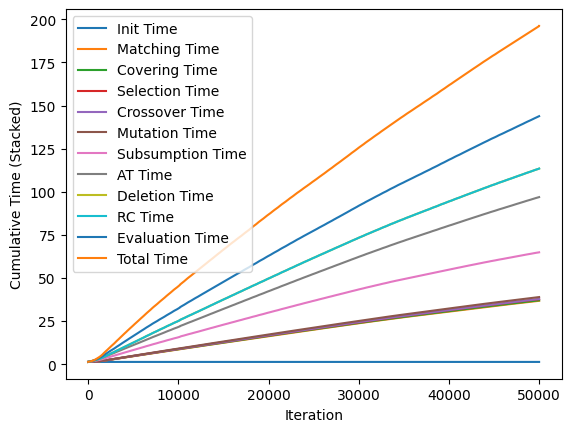

In [6]:
import matplotlib.pyplot as plt

def cumulativeFreq(freq):
    a = []
    c = []
    for i in freq:
        a.append(i+sum(c))
        c.append(i)
    return np.array(a)

def movingAvg(a,threshold=300):
    weights = np.repeat(1.0,threshold)/threshold
    conv = np.convolve(a,weights,'valid')
    return np.append(conv,np.full(threshold-1,conv[conv.size-1]),)

dataTracking = pd.read_csv("output/iterationData.csv")

iterations = dataTracking["Iteration"].values
gTime = dataTracking["Total Global Time"].values
mTime = dataTracking["Total Matching Time"].values
covTime = dataTracking["Total Covering Time"].values
crossTime = dataTracking["Total Crossover Time"].values
covTime = dataTracking["Total Covering Time"].values
mutTime = dataTracking["Total Mutation Time"].values
atTime = dataTracking["Total Attribute Tracking Time"].values
initTime = dataTracking["Total Model Initialization Time"].values
rcTime = dataTracking["Total Rule Compaction Time"].values
delTime = dataTracking["Total Deletion Time"].values
subTime = dataTracking["Total Subsumption Time"].values
selTime = dataTracking["Total Selection Time"].values
evalTime = dataTracking["Total Evaluation Time"].values

plt.plot(iterations,initTime,label="Init Time")
plt.plot(iterations,mTime+initTime,label="Matching Time")
plt.plot(iterations,covTime+mTime+initTime,label="Covering Time")
plt.plot(iterations,selTime+covTime+mTime+initTime,label="Selection Time")
plt.plot(iterations,crossTime+selTime+covTime+mTime+initTime,label="Crossover Time")
plt.plot(iterations,mutTime+crossTime+selTime+covTime+mTime+initTime,label="Mutation Time")
plt.plot(iterations,subTime+mutTime+crossTime+selTime+covTime+mTime+initTime,label="Subsumption Time")
plt.plot(iterations,atTime+subTime+mutTime+crossTime+selTime+covTime+mTime+initTime,label="AT Time")
plt.plot(iterations,delTime+atTime+subTime+mutTime+crossTime+selTime+covTime+mTime+initTime,label="Deletion Time")
plt.plot(iterations,rcTime+delTime+atTime+subTime+mutTime+crossTime+selTime+covTime+mTime+initTime,label="RC Time")
plt.plot(iterations,evalTime+rcTime+delTime+atTime+subTime+mutTime+crossTime+selTime+covTime+mTime+initTime,label="Evaluation Time")
plt.plot(iterations,gTime,label="Total Time")
plt.xlabel('Iteration')
plt.ylabel('Cumulative Time (Stacked)')
plt.legend()
plt.savefig('output/Figure4.png')
plt.show()



In [8]:
#load data
data = pd.read_csv('pipeline/cv_sim_data/cv_het/het_f1000_maf0.2/heterogeneous_cens0.1_surv_2024-04-07_CV_0_Train.txt', sep = '\t', header = 0)
timeLabel = 'eventTime'
censorLabel = 'eventStatus'
inst = 'inst'

#Derive the attribute and event array using the phenotype label
dataFeatures = data.drop([inst,timeLabel,censorLabel],axis = 1).values
dataEvents = data[[timeLabel,censorLabel]].values


#Optional: Retrieve the headers for each attribute as a length n array
dataHeaders = data.drop([timeLabel,censorLabel],axis=1).columns.values
headers = dataHeaders[:-1]

In [9]:
trainedModel.export_final_rule_population(headers,censorLabel,filename="output/fileRulePopulation.csv",DCAL=False)

populationData = pd.read_csv("output/fileRulePopulation.csv")
display(populationData)

,N0,N1,N2,N3,N4,N5,N6,N7,N8,N9,...,Accuracy,Numerosity,Avg Match Set Size,TimeStamp GA,Iteration Initialized,Specificity,Deletion Probability,Correct Count,Match Count,Epoch Complete
0,#,#,#,#,#,#,#,#,#,#,...,0.752952,2,302.234451,49969,23730,0.004,0.002036,574,1218,True
1,#,#,#,#,#,#,#,#,#,#,...,0.253677,4,245.933666,49998,24792,0.001,0.003408,4769,8979,True
2,#,#,#,#,#,#,#,#,#,#,...,0.738146,2,247.915124,49994,29324,0.001,0.001721,6989,13286,True
3,#,#,#,#,#,#,#,#,#,#,...,0.283220,1,265.506989,49992,29499,0.003,0.000894,2622,8854,True
4,#,#,#,#,#,#,#,#,#,#,...,0.689007,6,296.302657,49984,29984,0.002,0.005989,1478,2159,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
732,#,#,#,#,#,#,#,#,#,#,...,0.866937,1,291.912808,49984,49984,0.005,0.000983,11,13,True
733,#,#,#,#,#,#,#,#,#,#,...,0.965053,1,292.535192,49986,49986,0.006,0.000985,2,2,True
734,#,#,#,#,#,#,#,#,#,#,...,0.400414,2,294.557015,49992,49992,0.003,0.001984,20,74,True
735,#,#,#,#,#,#,#,#,#,#,...,0.757629,1,279.405792,49998,49998,0.005,0.000941,5,8,True


And the above final rule population exported in DCAL format:

In [10]:
trainedModel.export_final_rule_population(headers,censorLabel,filename="output/popData2.csv")

populationData2 = pd.read_csv("output/popData2.csv")
display(populationData2)

,Specified Values,Specified Attribute Names,eventStatus,Fitness,Accuracy,Numerosity,Avg Match Set Size,TimeStamp GA,Iteration Initialized,Specificity,Deletion Probability,Correct Count,Match Count,Epoch Complete
0,"0, 1, 1, 1","N105, N622, N761, M0P2","4.822500000000001,17.098197065120953",1.000000,0.752952,2,302.234451,49969,23730,0.004,0.002036,574,1218,True
1,0,M0P2,"12.674999999999997,54.1175",0.346015,0.253677,4,245.933666,49998,24792,0.001,0.003408,4769,8979,True
2,0,N934,"79.16,107.12919941996249",1.000000,0.738146,2,247.915124,49994,29324,0.001,0.001721,6989,13286,True
3,"0, 0, 1","N220, N390, M0P2","5.2074304770778195,24.31699892431465",0.449837,0.283220,1,265.506989,49992,29499,0.003,0.000894,2622,8854,True
4,"0, 0","N468, M0P2","12.674999999999997,54.1175",0.478685,0.689007,6,296.302657,49984,29984,0.002,0.005989,1478,2159,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
732,"0, 2, 0, 0, 0","N56, N157, N651, N980, M0P2","23.55854416359131,72.85354416359131",1.000000,0.866937,1,291.912808,49984,49984,0.005,0.000983,11,13,True
733,"1, 2, 0, 2, 1, 0","N256, N505, N604, N626, N693, N765","12.674999999999997,55.087500000000006",1.000000,0.965053,1,292.535192,49986,49986,0.006,0.000985,2,2,True
734,"0, 1, 1","N166, N622, N761","4.822500000000001,19.1775",0.270016,0.400414,2,294.557015,49992,49992,0.003,0.001984,20,74,True
735,"1, 1, 1, 1, 0","N20, N373, N440, N617, N687","12.674999999999997,45.77576682976038",1.000000,0.757629,1,279.405792,49998,49998,0.005,0.000941,5,8,True


And finally the rule population after rule compaction:

In [11]:
trainedModel.export_final_rule_population(headers,censorLabel,filename="output/popData3.csv",RCPopulation=True)

populationData3 = pd.read_csv("output/popData3.csv")
display(populationData3)

,Specified Values,Specified Attribute Names,eventStatus,Fitness,Accuracy,Numerosity,Avg Match Set Size,TimeStamp GA,Iteration Initialized,Specificity,Deletion Probability,Correct Count,Match Count,Epoch Complete
0,"0, 1, 1, 1","N105, N622, N761, M0P2","4.822500000000001,17.098197065120953",1.000000,0.752952,2,302.234451,49969,23730,0.004,0.002036,574,1218,True
1,0,N934,"79.16,107.12919941996249",1.000000,0.738146,2,247.915124,49994,29324,0.001,0.001721,6989,13286,True
2,"0, 0","N468, M0P2","12.674999999999997,54.1175",0.478685,0.689007,6,296.302657,49984,29984,0.002,0.005989,1478,2159,True
3,"0, 0","N3, M0P2","36.100421607422724,54.1175",0.811300,0.605410,3,246.838716,49984,32282,0.002,0.002567,2122,5037,True
4,0,N570,"79.16,99.0",1.000000,0.732321,2,264.464980,49994,32391,0.001,0.001860,4268,8214,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
424,"1, 0, 1, 1, 0","N148, N307, N316, N375, N376","22.912499999999998,54.1175",1.000000,0.909359,1,319.627044,49978,49978,0.005,0.001077,17,25,True
425,"0, 2, 0, 0, 0","N56, N157, N651, N980, M0P2","23.55854416359131,72.85354416359131",1.000000,0.866937,1,291.912808,49984,49984,0.005,0.000983,11,13,True
426,"1, 2, 0, 2, 1, 0","N256, N505, N604, N626, N693, N765","12.674999999999997,55.087500000000006",1.000000,0.965053,1,292.535192,49986,49986,0.006,0.000985,2,2,True
427,"1, 1, 1, 1, 0","N20, N373, N440, N617, N687","12.674999999999997,45.77576682976038",1.000000,0.757629,1,279.405792,49998,49998,0.005,0.000941,5,8,True


In [12]:
populationData3.to_csv('output/Table8.csv', index=False)